In [14]:
import seml
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd

In [15]:
output_dir = "figures"

In [16]:
models = ["WOT", "Moscot", "Moscot_online", "Moscot_r200", "Moscot_r50"]
n_cells = [2048+8192, 4096+16384, 8192+32768, 16384+65536, 32768+131072]

# CPU

In [17]:
results = seml.get_results('fixed_t_cpu_memory', to_data_frame=True)

  0%|          | 0/214 [00:00<?, ?it/s]

  0%|          | 0/214 [00:00<?, ?it/s]

In [18]:
results

,_id,result,config.overwrite,config.db_collection,config.anndata_dir,config.epsilon,config.key,config.lambda_1,config.lambda_2,config.max_iterations,config.model,config.run,config.threshold,config.seed,config.config_hash
0,1,"[252.62890625, 253.19140625, 253.19140625, 253...",1,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,WOT,0,0.00001,768830343,NaN
1,2,"[288.67578125, 288.8671875, 298.828125, 302.16...",2,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,Moscot,0,0.00001,771647593,NaN
2,3,"[280.89453125, 281.08203125, 292.9140625, 296....",3,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,Moscot_online,0,0.00001,877920129,NaN
3,4,"[271.40234375, 271.87890625, 273.77734375, 277...",4,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,Moscot_r200,0,0.00001,322456870,NaN
4,5,"[263.16015625, 263.75, 265.53515625, 268.99218...",5,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,Moscot_r50,0,0.00001,44272760,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,244,"[545.78125, 546.12109375, 556.859375, 558.7421...",244,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,Moscot_r200,4,0.00001,849735118,1180afd70458c55ae0c29eb474bdcc2c
210,245,"[550.734375, 550.8203125, 563.859375, 566.8867...",245,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,Moscot_r50,4,0.00001,842248269,99097dbb54bdf8bf0e20e7cda272118a
211,247,"[780.29296875, 780.7578125, 781.88671875, 784....",247,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,Moscot,4,0.00001,653420437,66a83e0d2b9372966e519126d1308729
212,249,"[797.8125, 794.2421875, 805.125, 808.15625, 81...",249,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,Moscot_r200,4,0.00001,39612255,f5b23b8b243304237665788042534304


In [19]:
"""d = results.groupby(["config.anndata_dir", "config.model"])#.mean()
d = d.reset_index().rename({'config.anndata_dir':'anndata_dir'}, axis = 'columns')"""

'd = results.groupby(["config.anndata_dir", "config.model"])#.mean()\nd = d.reset_index().rename({\'config.anndata_dir\':\'anndata_dir\'}, axis = \'columns\')'

In [20]:
dic = {}
dic["/home/icb/dominik.klein/data/tedsim_processed/tedsim_16384_65536_adata.h5ad"] = 16384+65536
dic["/home/icb/dominik.klein/data/tedsim_processed/tedsim_2048_8192_adata.h5ad"] = 2048+8192
dic["/home/icb/dominik.klein/data/tedsim_processed/tedsim_32768_131072_adata.h5ad"] = 32768+131072
dic["/home/icb/dominik.klein/data/tedsim_processed/tedsim_4096_16384_adata.h5ad"] = 4096+16384
dic["/home/icb/dominik.klein/data/tedsim_processed/tedsim_8192_32768_adata.h5ad"] = 8192+32768

In [21]:
import pandas as pd
results["n_cells"] = results["config.anndata_dir"].map(dic)

In [22]:
results["max_mem"] = results.apply(lambda x: max(x["result"]), axis=1)

In [23]:
import seaborn as sns
sns.set_style("whitegrid", {'xtick.direction': 'out', 'xtick.major.size': 5.0, 'xtick.minor.size': 5.0,
    'ytick.color': '.15', 'ytick.direction': 'out', 'ytick.major.size': 5.0, 'ytick.minor.size': 5.0, 
                           'font.family': ['DejaVu Sans'], 'font.scale': 1})
palette = 'deep'

In [24]:
labels_dict = {}
['Moscot', 'Moscot_online', 'Moscot_r200', 'Moscot_r50', 'WOT']
labels_dict["Moscot"] = "Moscot"
labels_dict["Moscot_online"] = "Moscot Online"
labels_dict["Moscot_r200"] = "Moscot, R=200"
labels_dict["Moscot_r50"] = "Moscot, R=50"
labels_dict["WOT"] = "WOT"

In [25]:

d = results

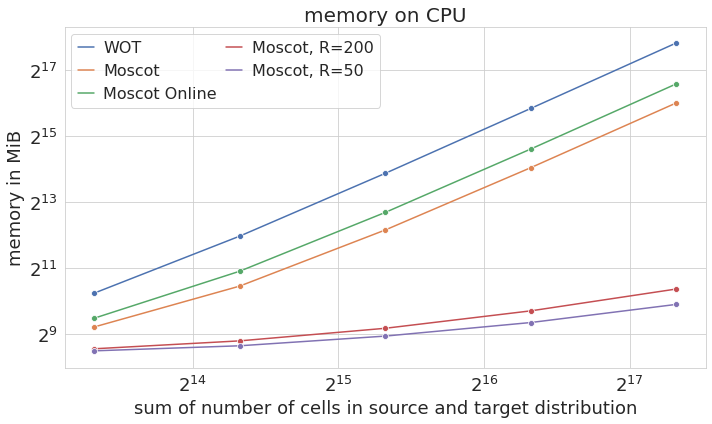

In [26]:
rows = 1
cols = 1
size = 5


fig, axs = plt.subplots(rows, cols, figsize=(2*cols*(size),rows*(size+1)))
pl = sns.lineplot(x='n_cells', y='max_mem', hue="config.model", err_style="bars", marker='o',
                     data=d, ax=axs, palette=palette, markers=True)
plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
handles, _labels = axs.get_legend_handles_labels()

labels = [*map(labels_dict.get, _labels)]

axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=2, loc='upper left', 
            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

axs.set_ylabel('memory in MiB', fontsize=18)

axs.set_xlabel('sum of number of cells in source and target distribution', fontsize=18)
axs.tick_params(axis='both', which='major', labelsize=18)
axs.set_title("memory on CPU", fontsize=20)
_, xlabels = plt.xticks()




plt.tight_layout()
#if save_figure:
#    plt.savefig(FIG_DIR + f'/fig_2_b.jpg', dpi=300)
plt.show()

In [33]:
results[(results["config.model"] == "Moscot") & (results["n_cells"] == 10240)]

,_id,result,config.overwrite,config.db_collection,config.anndata_dir,config.epsilon,config.key,config.lambda_1,config.lambda_2,config.max_iterations,config.model,config.run,config.threshold,config.seed,config.config_hash,n_cells,max_mem
1,2,"[288.67578125, 288.8671875, 298.828125, 302.16...",2,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,Moscot,0,0.00001,771647593,NaN,10240,605.117188
23,27,"[263.24609375, 263.76953125, 266.98828125, 274...",27,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,Moscot,1,0.00001,885306635,NaN,10240,570.894531
48,52,"[286.1953125, 286.390625, 298.05859375, 301.56...",52,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,Moscot,2,0.00001,480910418,NaN,10240,601.765625
71,77,"[265.203125, 265.75390625, 268.48046875, 272.4...",77,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,Moscot,3,0.00001,958821535,NaN,10240,573.804688
96,102,"[282.125, 282.38671875, 294.1328125, 297.64453...",102,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,Moscot,4,0.00001,647490475,NaN,10240,597.898438
121,127,"[297.86328125, 297.8359375, 307.1796875, 311.0...",127,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,Moscot,0,0.00001,567247462,4beb40de059044e668bd431fed4f0a43,10240,614.863281
140,152,"[295.08984375, 291.9609375, 303.44921875, 307....",152,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,Moscot,1,0.00001,314704447,e763890065d7a0b8f0985fdcf81a9123,10240,606.820312
159,177,"[263.15625, 263.765625, 266.3828125, 273.03515...",177,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,Moscot,2,0.00001,491056586,33da1d132cf438929987eca11f1fbf56,10240,570.449219
178,202,"[286.40625, 284.578125, 296.484375, 299.839843...",202,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,Moscot,3,0.00001,338582521,365ad109969abaf6ea3e366a0b3e57a9,10240,603.597656
196,227,"[263.09375, 263.76953125, 265.76171875, 269.69...",227,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,Moscot,4,0.00001,539353131,fab36952bf69cff268a28c8412a5e1de,10240,572.171875


In [32]:
results[(results["config.model"] == "WOT") & (results["n_cells"] == 10240)]

,_id,result,config.overwrite,config.db_collection,config.anndata_dir,config.epsilon,config.key,config.lambda_1,config.lambda_2,config.max_iterations,config.model,config.run,config.threshold,config.seed,config.config_hash,n_cells,max_mem
0,1,"[252.62890625, 253.19140625, 253.19140625, 253...",1,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,WOT,0,0.00001,768830343,NaN,10240,1184.132812
22,26,"[272.41015625, 272.640625, 272.640625, 272.640...",26,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,WOT,1,0.00001,352806637,NaN,10240,1207.265625
47,51,"[281.3359375, 281.34765625, 281.34765625, 281....",51,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,WOT,2,0.00001,937317046,NaN,10240,1222.058594
70,76,"[252.609375, 253.19921875, 253.19921875, 253.1...",76,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,WOT,3,0.00001,210202986,NaN,10240,1184.195312
95,101,"[252.703125, 253.22265625, 253.22265625, 253.2...",101,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,WOT,4,0.00001,213177162,NaN,10240,1184.226562
120,126,"[275.82421875, 275.3203125, 275.3203125, 275.3...",126,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,WOT,0,0.00001,544207715,8f3aba5695ed98c2f0793f729bb48a3f,10240,1211.890625
139,151,"[285.30859375, 285.296875, 285.296875, 285.296...",151,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,WOT,1,0.00001,711137931,180e333c0200e03e1fb11e04fcb40c18,10240,1225.875000
158,176,"[273.828125, 274.16015625, 274.16015625, 274.1...",176,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,WOT,2,0.00001,669919765,0352343fa5a21d513384c0fec046b113,10240,1222.707031
177,201,"[285.375, 285.625, 285.625, 285.625, 285.625, ...",201,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,WOT,3,0.00001,963143202,663c2884aa0d54c953036c9206b17f2e,10240,1226.132812
195,226,"[252.640625, 253.20703125, 253.20703125, 253.2...",226,fixed_t_cpu_memory,/home/icb/dominik.klein/data/tedsim_processed/...,0.5,time,2,2,100000,WOT,4,0.00001,458238492,4b88ab18a27c85f839245ad3c469ddc7,10240,1184.179688


In [29]:
n_cells_log = d["n_cells_log"].unique()

KeyError: 'n_cells_log'

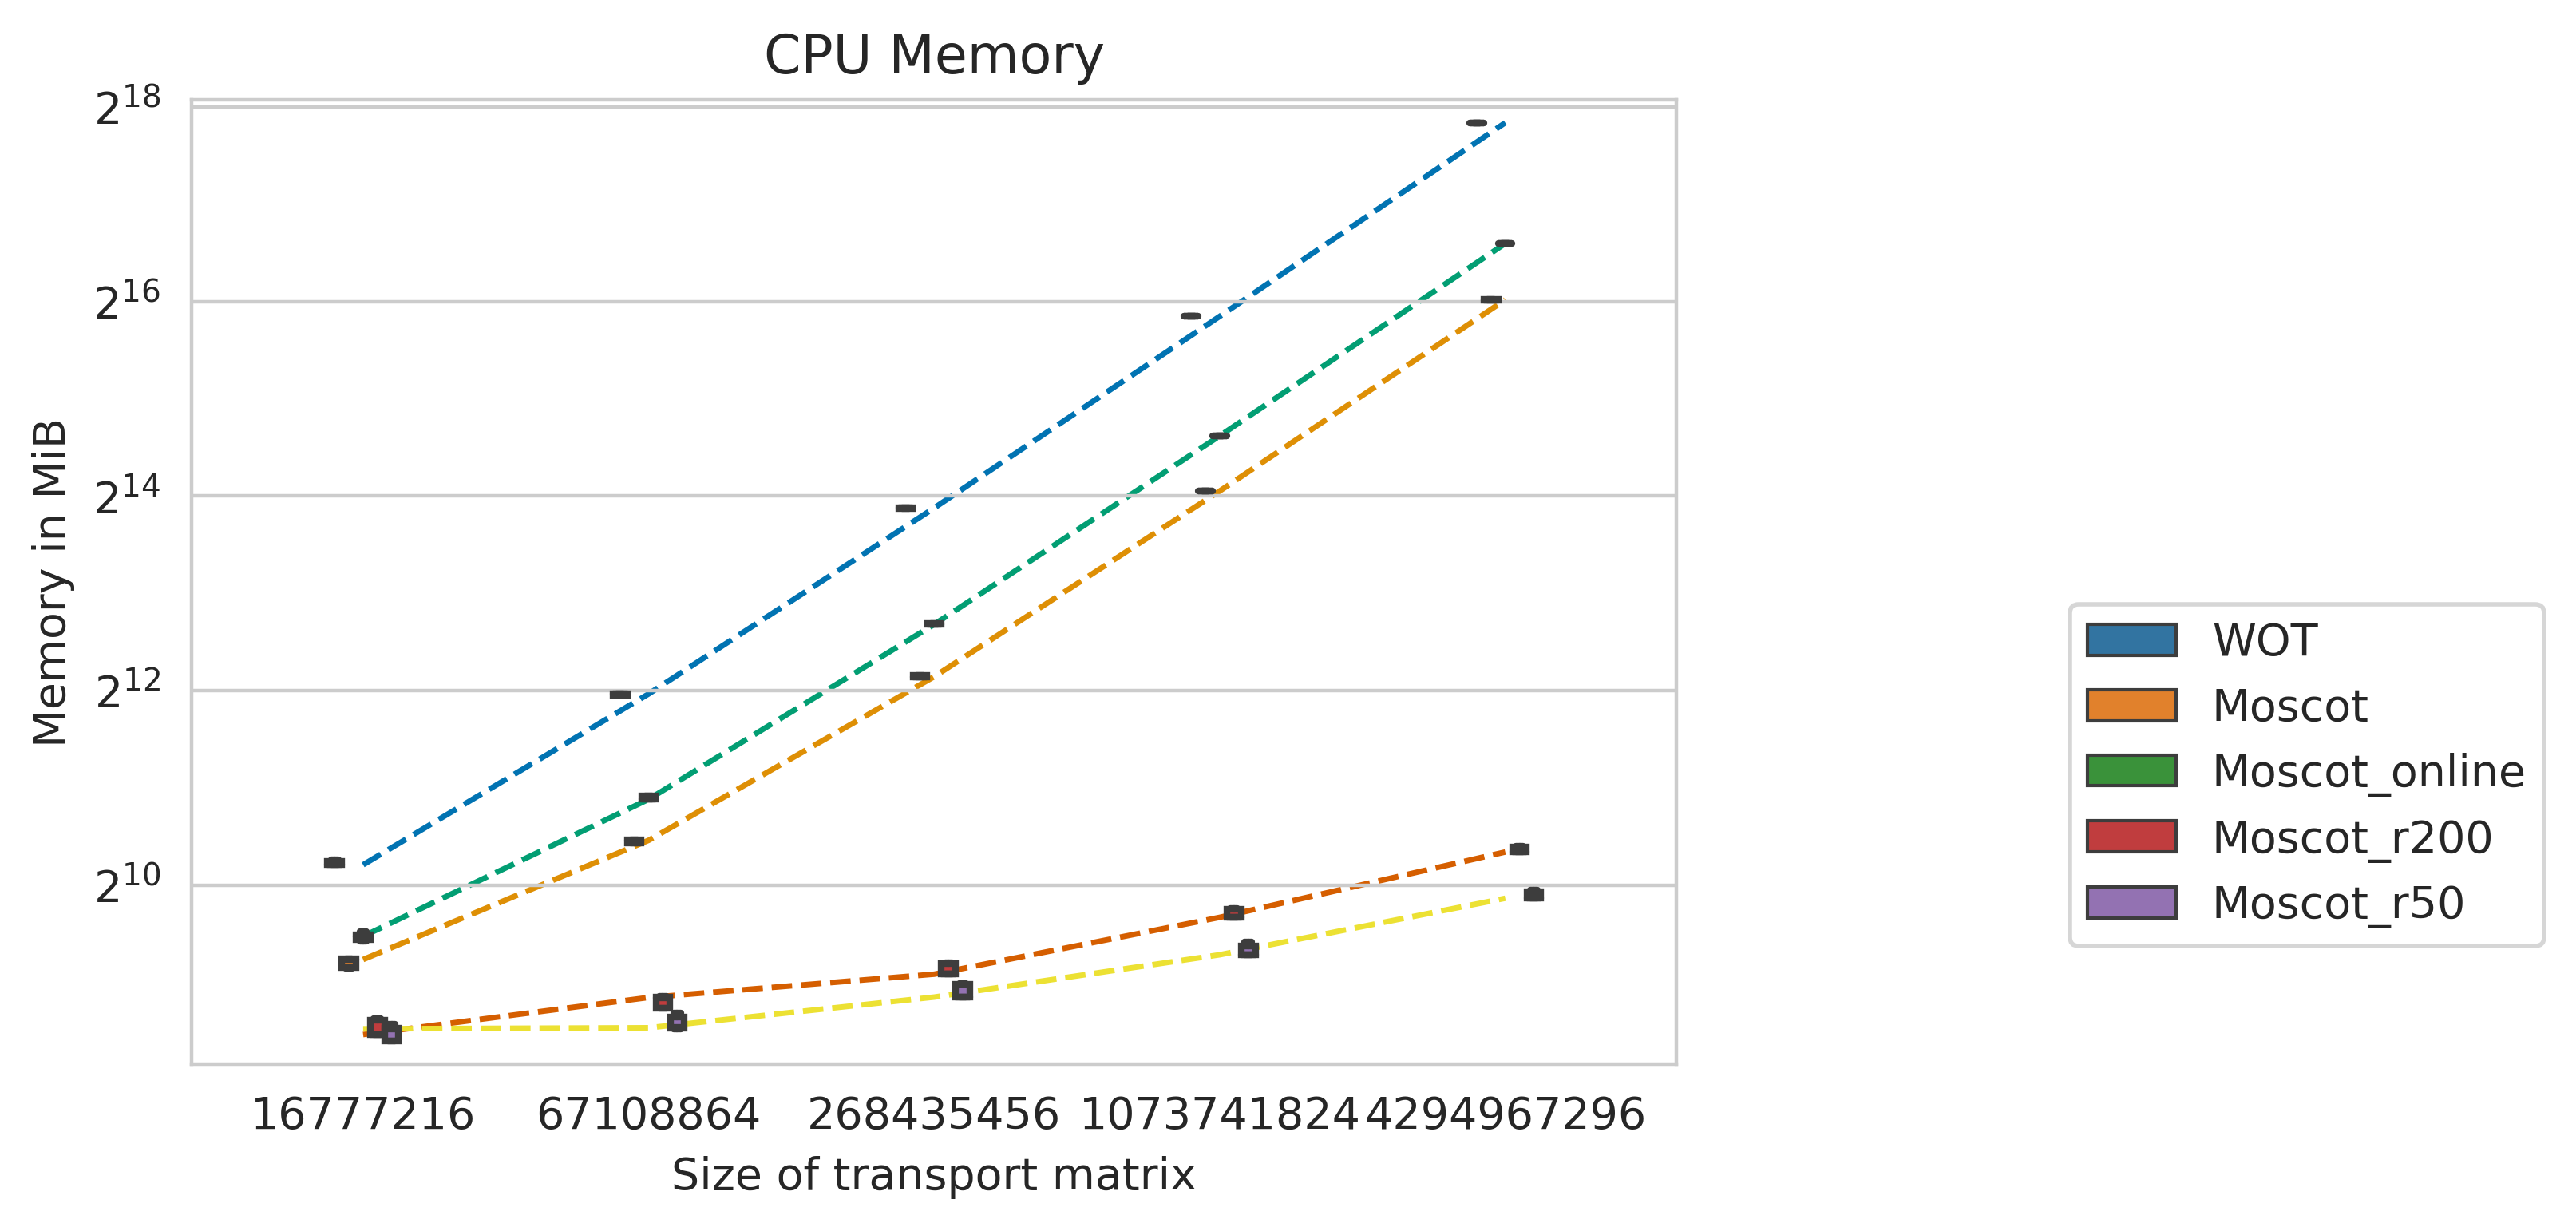

In [76]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=400)
colors = [sns.palettes.color_palette('colorblind')[i] for i in range(len(models))]
colors[-1] = sns.palettes.color_palette('colorblind')[len(models) + 3]

flierprops = dict(marker='o', markersize=2, markerfacecolor='none', linestyle='none')

sns.boxplot(x='n_cells', y='max_mem', hue="config.model", data=d, ax=ax, width=0.25)#,
            #saturation=1,
            #dodge=False,
            #flierprops=flierprops,
            #linewidth=1,
            #palette=colors)

plt.yscale('log', basey=2)

data = d.groupby(["config.model", "n_cells_log"]).median()
for i, cat in enumerate(models):
    med = data.loc[cat]["max_mem"]
    n_cells_log = [1,2,3,4,5]
    ax.plot(range(len(n_cells_log)), med, c=colors[i], zorder=-1, ls='--', lw=1.25)

ax.legend(loc='upper left', bbox_to_anchor=(1.25, 0.5), ncol=1)

ax.set_title("CPU Memory")
ax.set_xlabel('Size of transport matrix')
ax.set_ylabel('Memory in MiB')
ax.margins(0.025)


fig.show()